- competition/dataset : [https://www.kaggle.com/c/mercari-price-suggestion-challenge](https://www.kaggle.com/c/mercari-price-suggestion-challenge)
- date : 2021/03/17
- original : [https://www.kaggle.com/knowledgegrappler/a-simple-nn-solution-with-keras-0-48611-pl/](https://www.kaggle.com/knowledgegrappler/a-simple-nn-solution-with-keras-0-48611-pl/)

## A simple nn solution with Keras (~0.48611 PL)

**✏ 필사 1회** 

In [3]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline

import math

import warnings
warnings.filterwarnings('ignore')

In [4]:
# https://www.kaggle.com/marknagelberg/rmsle-function
def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1))**2.0 for i, pred in enumerate(y_pred)]
    return (sum(to_sum) * (1.0/len(y)))**0.5

In [10]:
# load data
print('Loading data...')
train = pd.read_table('data/train.tsv')
test = pd.read_table('data/test.tsv')
print(train.shape)
print(test.shape)

Loading data...
(1482535, 8)
(693359, 7)


In [11]:
# handle missing values
print('Handling missing values...')
def handle_missing(dataset):
    dataset['category_name'].fillna('missing', inplace=True)
    dataset['brand_name'].fillna('missing', inplace=True)
    dataset['item_description'].fillna('missing', inplace=True)
    return dataset

train = handle_missing(train)
test = handle_missing(test)
print(train.shape)
print(test.shape)

Handling missing values...
(1482535, 8)
(693359, 7)


In [12]:
train.head(3)

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,missing,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...


In [17]:
# process categorical data
print('Handling categorical variables...')
le = LabelEncoder()

le.fit(np.hstack([train['category_name'], test['category_name']]))
train['category_name'] = le.transform(train['category_name'])
test['category_name'] = le.transform(test['category_name'])

le.fit(np.hstack([train['brand_name'], test['brand_name']]))
train['brand_name'] = le.transform(train['brand_name'])
test['brand_name'] = le.transform(test['brand_name'])
del le

train.head(3)

Handling categorical variables...


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,829,5265,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,86,3889,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,1277,4588,10.0,1,Adorable top with a hint of lace and a key hol...


In [23]:
# process text: raw
print('Text to seq process...')
from keras.preprocessing.text import Tokenizer
raw_text = np.hstack([train['item_description'].str.lower(), train['name'].str.lower()])

print('    Fitting tokenizer...')
tok_raw = Tokenizer()
tok_raw.fit_on_texts(raw_text)
print('    Transforming text to seq...')

train['seq_item_description'] = tok_raw.texts_to_sequences(train['item_description'].str.lower())
test['seq_item_description'] = tok_raw.texts_to_sequences(test['item_description'].str.lower())
train['seq_name'] = tok_raw.texts_to_sequences(train['name'].str.lower())
test['seq_name'] = tok_raw.texts_to_sequences(test['name'].str.lower())
train.head(3)

Text to seq process...
    Fitting tokenizer...
    Transforming text to seq...


,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description,seq_item_description,seq_name
0,0,MLB Cincinnati Reds T Shirt Size XL,3,829,5265,10.0,1,No description yet,"[12, 68, 79]","[3852, 8823, 6896, 208, 84, 6, 155]"
1,1,Razer BlackWidow Chroma Keyboard,3,86,3889,52.0,0,This keyboard is in great condition and works ...,"[29, 2627, 10, 7, 39, 17, 1, 207, 51, 19, 1113...","[10760, 25565, 16369, 2627]"
2,2,AVA-VIV Blouse,1,1277,4588,10.0,1,Adorable top with a hint of lace and a key hol...,"[604, 60, 9, 4, 5347, 11, 192, 1, 4, 886, 1290...","[7634, 10563, 666]"


In [28]:
tok_raw.word_index

{'and': 1,
 'the': 2,
 'for': 3,
 'a': 4,
 'new': 5,
 'size': 6,
 'in': 7,
 'to': 8,
 'with': 9,
 'is': 10,
 'of': 11,
 'no': 12,
 'free': 13,
 'on': 14,
 'i': 15,
 'brand': 16,
 'condition': 17,
 'you': 18,
 'it': 19,
 'shipping': 20,
 'rm': 21,
 '2': 22,
 'or': 23,
 'black': 24,
 'pink': 25,
 'are': 26,
 'bundle': 27,
 '1': 28,
 'this': 29,
 'worn': 30,
 'used': 31,
 '3': 32,
 'my': 33,
 '5': 34,
 'all': 35,
 'never': 36,
 'will': 37,
 'but': 38,
 'great': 39,
 'not': 40,
 'price': 41,
 'have': 42,
 'from': 43,
 'small': 44,
 '6': 45,
 'one': 46,
 '4': 47,
 'color': 48,
 'your': 49,
 'only': 50,
 'like': 51,
 'be': 52,
 'please': 53,
 'me': 54,
 'as': 55,
 'has': 56,
 'box': 57,
 'good': 58,
 'white': 59,
 'top': 60,
 'tags': 61,
 'can': 62,
 'out': 63,
 '7': 64,
 'if': 65,
 'blue': 66,
 'very': 67,
 'description': 68,
 'medium': 69,
 'lularoe': 70,
 'up': 71,
 'set': 72,
 'large': 73,
 'firm': 74,
 'iphone': 75,
 'so': 76,
 'ship': 77,
 'that': 78,
 'yet': 79,
 'secret': 80,
 '8': 8

In [25]:
# sequences variables analysis
max_name_seq = np.max([np.max(train['seq_name'].apply(lambda x: len(x))),
                       np.max(test['seq_name'].apply(lambda x: len(x)))])
max_seq_item_description = np.max([np.max(train['seq_item_description'].apply(lambda x: len(x))),
                                    np.max(test['seq_item_description'].apply(lambda x: len(x)))])
print('max name seq', str(max_name_seq))
print('max item desc seq', str(max_seq_item_description))

max name seq 17
max item desc seq 269


<AxesSubplot:>

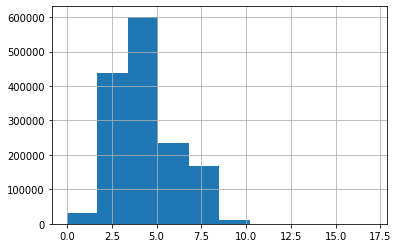

In [26]:
train['seq_name'].apply(lambda x: len(x)).hist()

<AxesSubplot:>

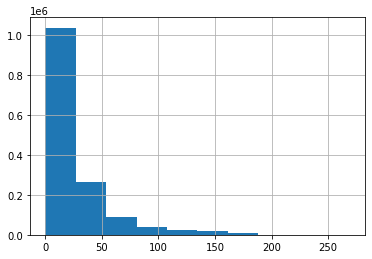

In [27]:
train['seq_item_description'].apply(lambda x: len(x)).hist()

In [38]:
# embedding max values
# 히스토그램 기준으로 다음 길이 선택
MAX_NAME_SEQ = 10
MAX_ITEM_DESC_SEQ = 75
MAX_TEXT = np.max([np.max(train['seq_name'].max()),
                   np.max(test['seq_name'].max()),
                   np.max(train['seq_item_description'].max()),
                   np.max(test['seq_item_description'].max())]) + 2
MAX_CATEGORY = np.max([train['category_name'].max(), test['category_name'].max()]) + 1
MAX_BRAND = np.max([train['brand_name'].max(), test['brand_name'].max()]) + 1
MAX_CONDITION = np.max([train['item_condition_id'].max(),
                        test['item_condition_id'].max()]) + 1

array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

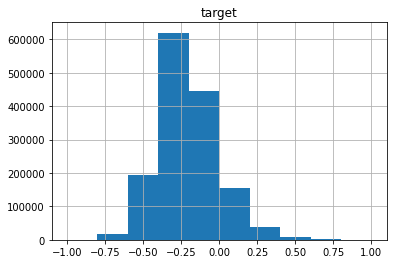

In [34]:
# scale target variable
train['target'] = np.log(train['price'] + 1)
target_scaler = MinMaxScaler(feature_range=(-1, 1))
train['target'] = target_scaler.fit_transform(train['target'].values.reshape(-1, 1))
pd.DataFrame(train['target']).hist()

In [36]:
# extract development test
dtrain, dvalid = train_test_split(train, random_state=123, train_size=0.99)
print(dtrain.shape)
print(dvalid.shape)

(1467709, 11)
(14826, 11)


In [43]:
# keras data definition
from keras.preprocessing.sequence import pad_sequences

def get_keras_data(dataset):
    X = {
        'name':pad_sequences(dataset['seq_name'], maxlen=MAX_NAME_SEQ),
        'item_desc':pad_sequences(dataset['seq_item_description'], maxlen=MAX_ITEM_DESC_SEQ),
        'brand_name':np.array(dataset['brand_name']),
        'category_name':np.array(dataset['category_name']),
        'item_condition':np.array(dataset['item_condition_id']),
        'num_vars':np.array(dataset[['shipping']])
    }
    return X

x_train = get_keras_data(dtrain)
x_valid = get_keras_data(dvalid)
x_test = get_keras_data(test)

In [46]:
# keras model definition
from keras.layers import (Input, Dropout, Dense, BatchNormalization, Activation,
                          concatenate, GRU, Embedding, Flatten, BatchNormalization)
from keras.models import Model
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from keras import backend as K

def get_callbacks(filepath, patience=2):
    es = EarlyStopping('val_loss', patience=patience, mode='min')
    msave = ModelCheckpoint(filepath, save_best_only=True)
    return [es, msave]

def rmsle_cust(y_true, y_pred):
    first_log = K.log(K.clip(y_pred, K.epsilon(), None) + 1.)
    second_log = K.log(K.clip(y_true, K.epsilon(), None) + 1.)
    return K.sqrt(K.mean(K.square(first_log - second_log), axis=-1))

def get_model():
    # params
    dr_r = 0.1
    
    # inputs
    name = Input(shape=[x_train['name'].shape[1]], name='name')
    item_desc = Input(shape=[x_train['item_desc'].shape[1]], name='item_desc')
    brand_name = Input(shape=[1], name='brand_name')
    category_name = Input(shape=[1], name='category_name')
    item_condition = Input(shape=[1], name='item_condition')
    num_vars = Input(shape=[x_train['num_vars'].shape[1]], name='num_vars')
    
    # embedding layers
    emb_name = Embedding(MAX_TEXT, 50)(name)
    emb_item_desc = Embedding(MAX_TEXT, 50)(item_desc)
    emb_brand_name = Embedding(MAX_BRAND, 10)(brand_name)
    emb_category_name = Embedding(MAX_CATEGORY, 10)(category_name)
    emb_item_condition = Embedding(MAX_CONDITION, 5)(item_condition)
    
    # rnn layer
    rnn_layer1 = GRU(16)(emb_item_desc)
    rnn_layer2 = GRU(8)(emb_name)
    
    # main layer
    main_l = concatenate([
        Flatten()(emb_brand_name),
        Flatten()(emb_category_name),
        Flatten()(emb_item_condition),
        rnn_layer1,
        rnn_layer2,
        num_vars
    ])
    main_l = Dropout(dr_r)(Dense(128)(main_l))
    main_l = Dropout(dr_r)(Dense(64)(main_l))
    
    # output
    output = Dense(1, activation='linear')(main_l)
    
    # model
    model = Model([
        name, item_desc, brand_name, category_name, item_condition, num_vars
    ], output)
    model.compile(loss='mse', optimizer='adam', metrics=['mae', rmsle_cust])
    
    return model

model = get_model()
model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
brand_name (InputLayer)         [(None, 1)]          0                                            
__________________________________________________________________________________________________
category_name (InputLayer)      [(None, 1)]          0                                            
__________________________________________________________________________________________________
item_condition (InputLayer)     [(None, 1)]          0                                            
__________________________________________________________________________________________________
item_desc (InputLayer)          [(None, 75)]         0                                            
_______________________________________________________________________________________

In [53]:
# fitting the model
BATCH_SIZE = 10000
epochs = 10

model = get_model()
model.fit(x_train, dtrain['target'], epochs=epochs, batch_size=BATCH_SIZE,
          validation_data=(x_valid, dvalid['target']), verbose=1)

Epoch 1/10
147/147 [==============================] - 194s 1s/step - loss: 0.0223 - mae: 0.1128 - rmsle_cust: 0.0143 - val_loss: 0.0162 - val_mae: 0.0969 - val_rmsle_cust: 0.0128
Epoch 2/10
147/147 [==============================] - 177s 1s/step - loss: 0.0156 - mae: 0.0944 - rmsle_cust: 0.0125 - val_loss: 0.0154 - val_mae: 0.0940 - val_rmsle_cust: 0.0124
Epoch 3/10
147/147 [==============================] - 177s 1s/step - loss: 0.0145 - mae: 0.0908 - rmsle_cust: 0.0121 - val_loss: 0.0152 - val_mae: 0.0936 - val_rmsle_cust: 0.0123
Epoch 4/10
147/147 [==============================] - 178s 1s/step - loss: 0.0138 - mae: 0.0885 - rmsle_cust: 0.0117 - val_loss: 0.0152 - val_mae: 0.0935 - val_rmsle_cust: 0.0122
Epoch 5/10
147/147 [==============================] - 176s 1s/step - loss: 0.0132 - mae: 0.0863 - rmsle_cust: 0.0114 - val_loss: 0.0152 - val_mae: 0.0935 - val_rmsle_cust: 0.0123
Epoch 6/10
147/147 [==============================] - 176s 1s/step - loss: 0.0127 - mae: 0.0845 - rmsle_c

In [54]:
# evaluate the model on dev test: what is it doing?
val_preds = model.predict(x_valid)
val_preds = target_scaler.inverse_transform(val_preds)
val_preds = np.exp(val_preds) + 1

# mean_absolute_error, mean_squared_log_error
y_true = np.array(dvalid['price'].values)
y_pred = val_preds[:, 0]
v_rmsle = rmsle(y_true, y_pred)
print('RMSLE error on dev test:', str(v_rmsle))

RMSLE error on dev test: 0.48315935292071005


In [55]:
# create predictions
preds = model.predict(x_test, batch_size=BATCH_SIZE)
preds = target_scaler.inverse_transform(preds)
preds = np.exp(preds) - 1

submission = test[['test_id']]
submission['price'] = preds

<AxesSubplot:>

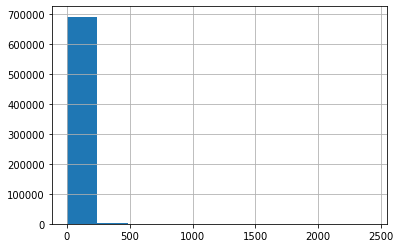

In [56]:
submission.to_csv('data/submission_2_myNNsubmission.csv', index=False)
submission['price'].hist()

다음은 nn이 이 문제를 어떻게 해결할 수 있는지에 대한 예시입니다.
```
- embedding factor 향상
- batch size 축소
- Batch Normalization 추가
- LSTM, Bidirectional RNN, stack RNN 시도
- layer 추가 혹은 rnn 결과 추가
```